<a href="https://colab.research.google.com/github/erthersany/Data-Analysis-Projects/blob/main/Project_on_Decision_Tree_Classifier_%26_Random_Forest_Classifier_(Credit_Card_Fraud_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold # Use KFold instead of kfold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV


# Import the Dataset

In [14]:
df = pd.read_csv('/content/creditcard.csv')


# Data Analysis(DM, DC,DE,DV,EDA)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [22]:
df.shape

(284807, 31)

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: >

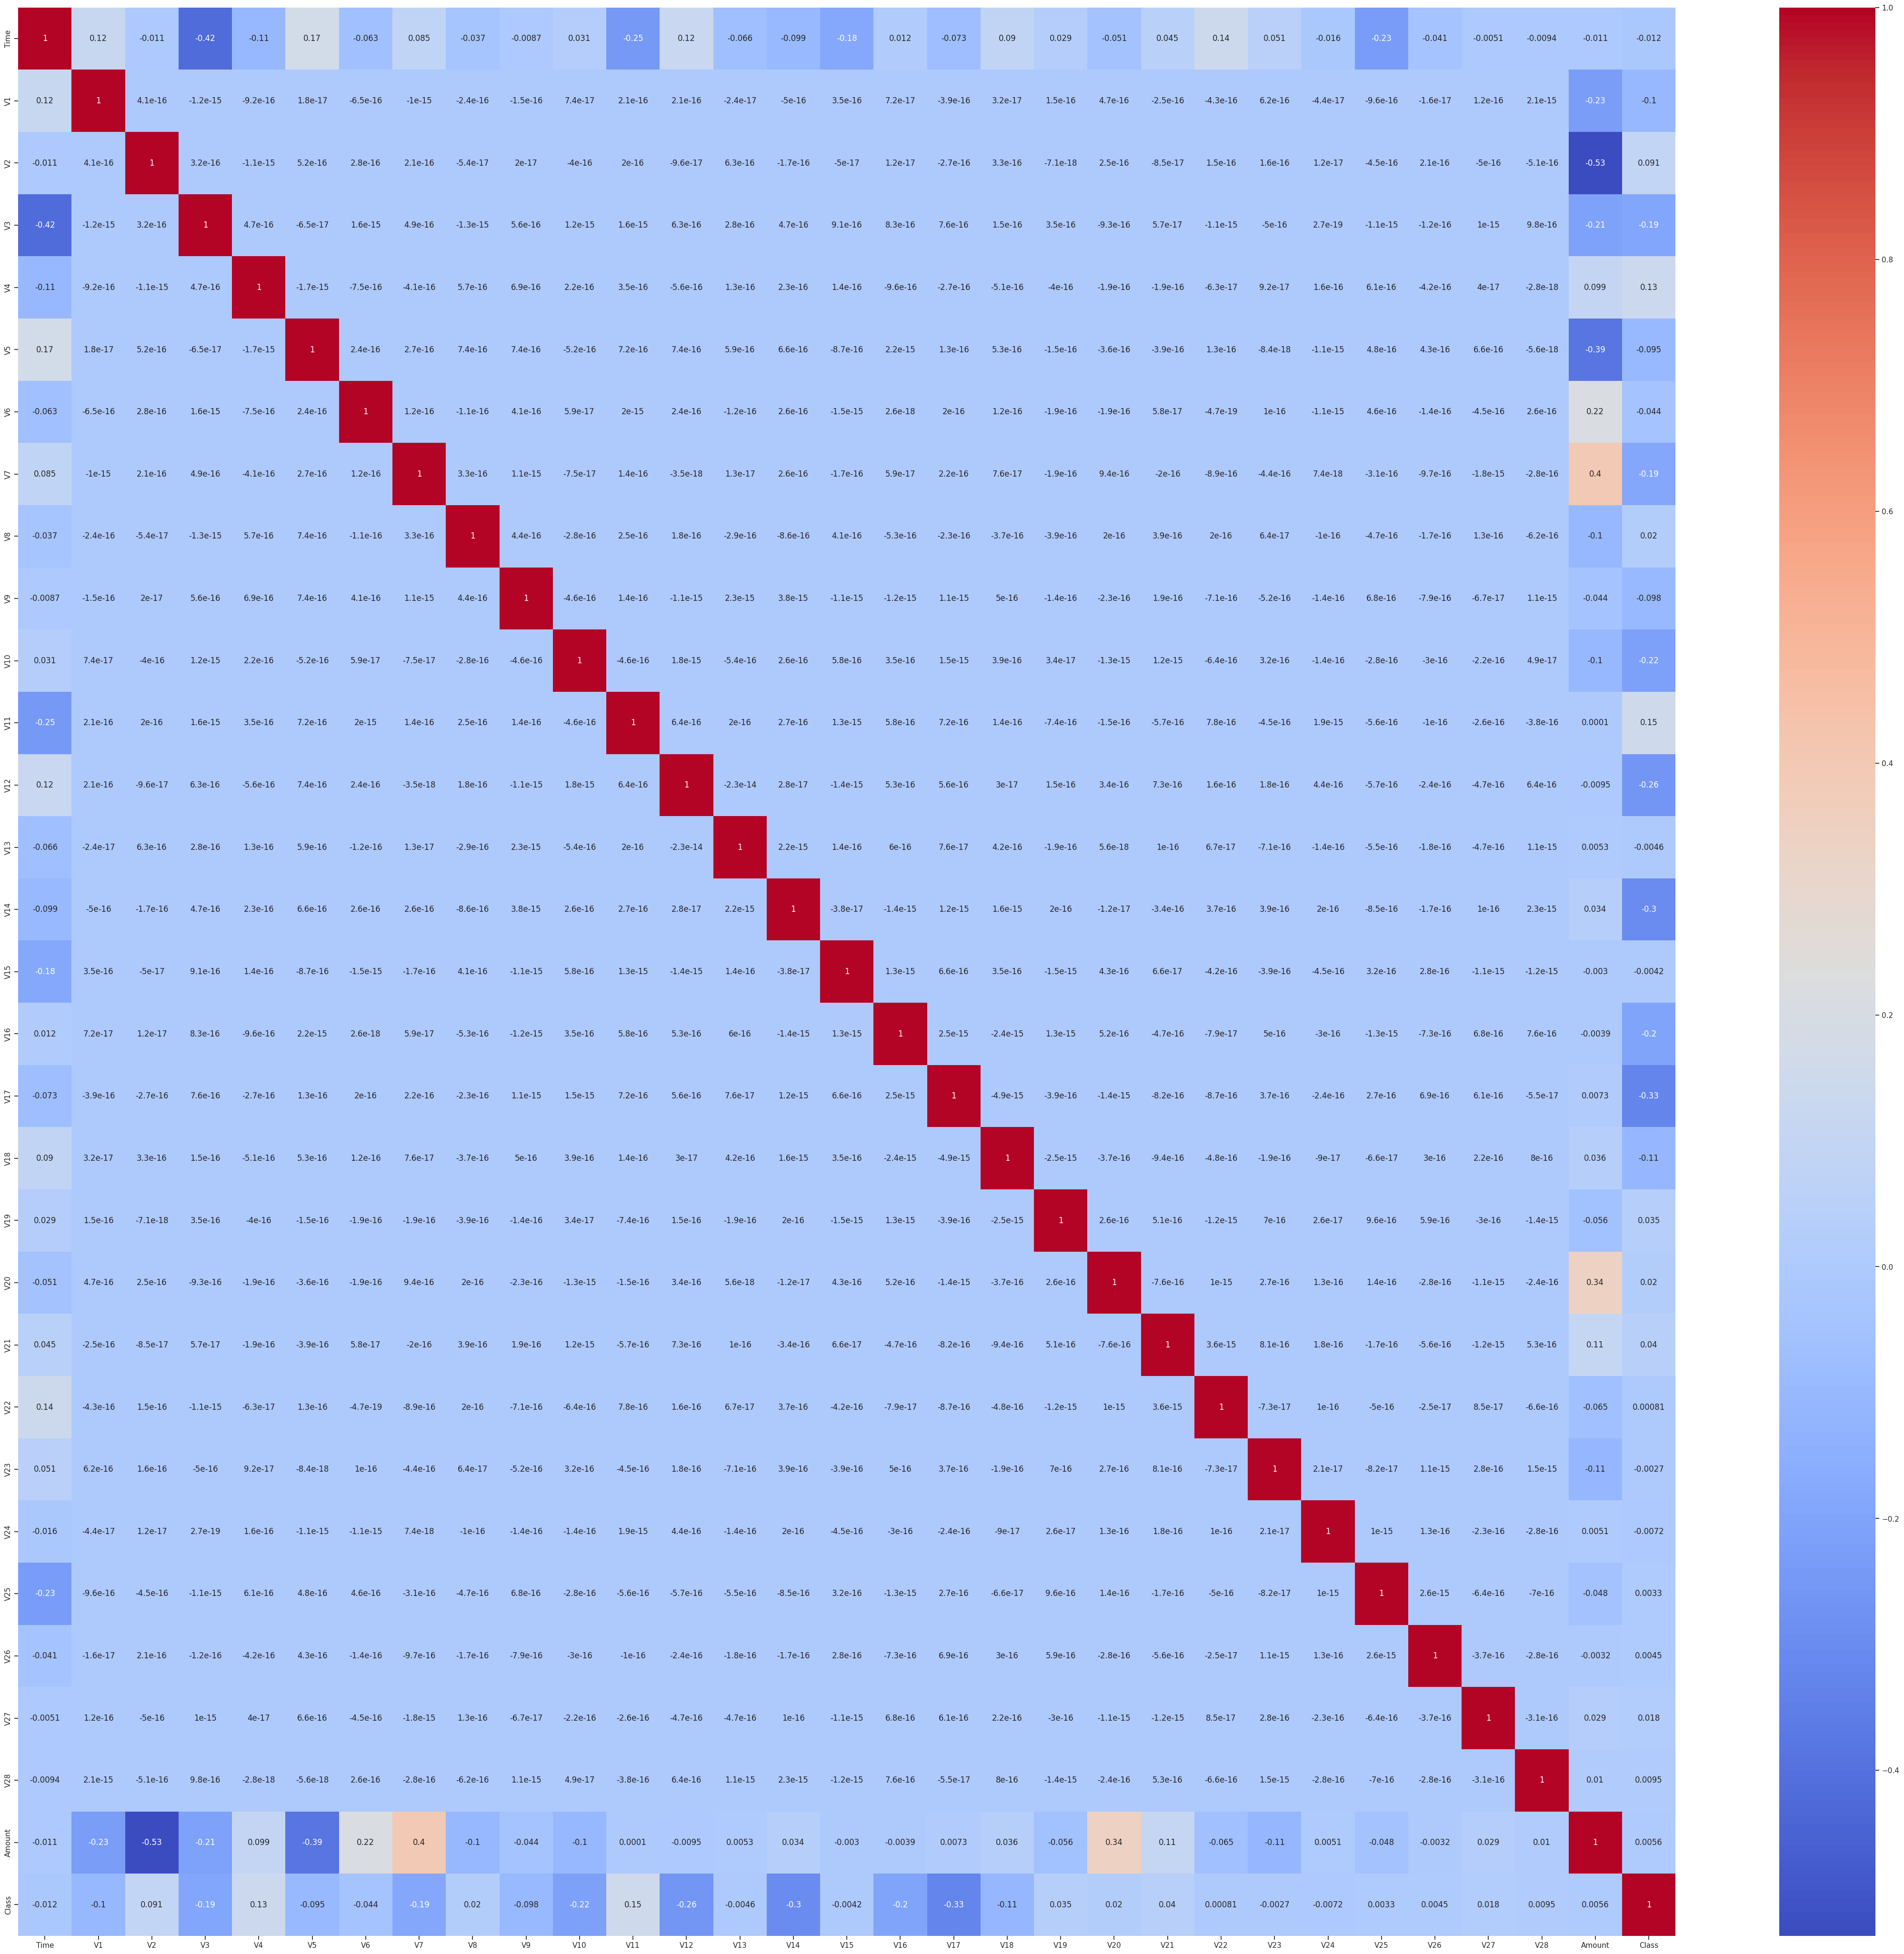

In [26]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Data Preprocessing - Feature engneering(Encoders, Scaling, Feature Importance/Selection, Hyper parameter Tunning etc.)

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [29]:
model.feature_importances_

array([0.01621308, 0.01283942, 0.01474125, 0.02806423, 0.03618158,
       0.01286701, 0.01425557, 0.02519139, 0.01364247, 0.03529136,
       0.06455819, 0.07216643, 0.11210171, 0.01164492, 0.13201027,
       0.01263458, 0.06363096, 0.13197353, 0.04733744, 0.01442635,
       0.01462655, 0.01848656, 0.01201559, 0.00871384, 0.01343196,
       0.01047905, 0.01433782, 0.01410863, 0.01110186, 0.0109264 ])

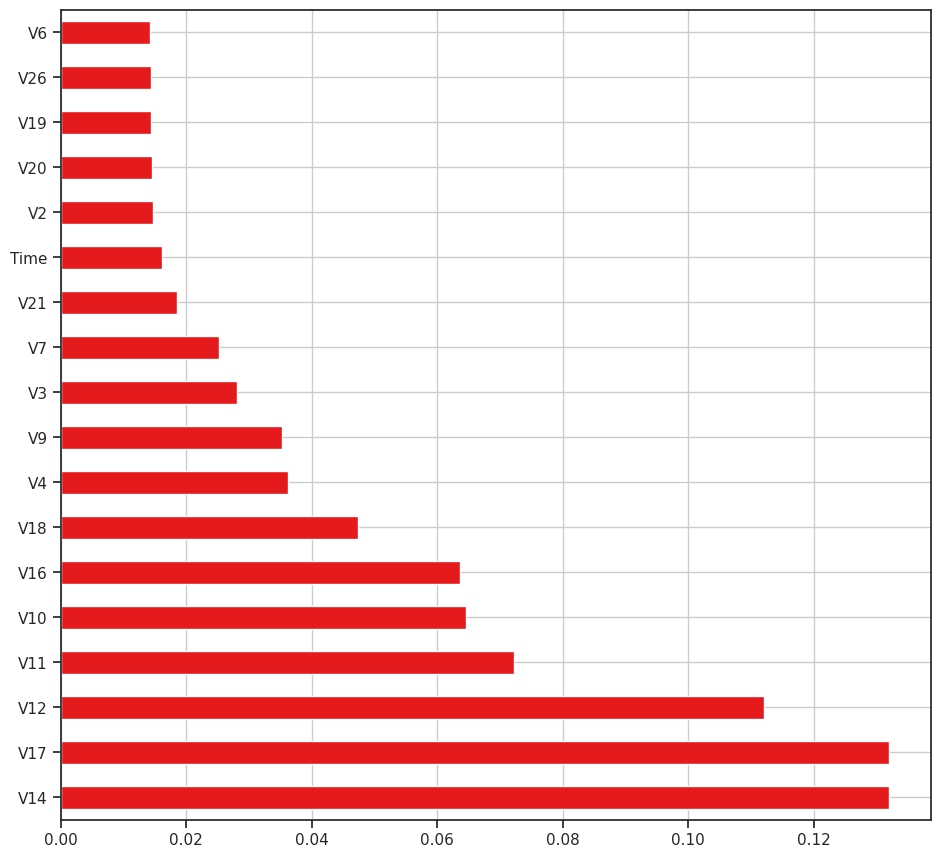

In [37]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_, index=x.columns)
feat.nlargest(18).plot(kind='barh')
plt.grid()

In [38]:
plots = feat.nlargest(18)

In [39]:
plots.index

Index(['V14', 'V17', 'V12', 'V11', 'V10', 'V16', 'V18', 'V4', 'V9', 'V3', 'V7',
       'V21', 'Time', 'V2', 'V20', 'V19', 'V26', 'V6'],
      dtype='object')

In [41]:
cols = ['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V18', 'V9', 'V4', 'V3', 'V7',
       'V21', 'V1', 'V26', 'Time', 'V2', 'V19', 'V8']
x_new = x[cols]

In [42]:
x_new.head(1)

,V17,V14,V12,V10,V11,V16,V18,V9,V4,V3,V7,V21,V1,V26,Time,V2,V19,V8
0,0.207971,-0.311169,-0.617801,0.090794,-0.5516,-0.470401,0.025791,0.363787,1.378155,2.536347,0.239599,-0.018307,-1.359807,-0.189115,0.0,-0.072781,0.403993,0.098698


In [43]:
x.shape

(284807, 30)

In [44]:
x_new.shape

(284807, 18)

# Spliting of data into sets - CV

In [45]:
skf = StratifiedKFold(n_splits=10)

In [46]:
for train_index, test_index in skf.split(x,y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [47]:
for train_index, test_index in skf.split(x_new,y):
  x_train, x_test = x_new.iloc[train_index], x_new.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [48]:
x_train.shape

(256327, 18)

In [49]:
x_new.shape

(284807, 18)

# Model Selection

In [59]:
decision = DecisionTreeClassifier()
randomf = RandomForestClassifier()


# Hyper Parameter tuning for RandomForestClassifier

In [51]:
n_estimators =[i for i in np.linspace(100,2000,20)]
max_features = ['auto','sqrt','log2']
max_depth = [int(i) for i in np.linspace(2,100,20)]
min_samples_split = [int(i) for i in range(2,101,2)]
min_samples_leaf = [int(i) for i in range(1,11)]

In [52]:
parameters = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [53]:
parameters

{'n_estimators': [100.0,
  200.0,
  300.0,
  400.0,
  500.0,
  600.0,
  700.0,
  800.0,
  900.0,
  1000.0,
  1100.0,
  1200.0,
  1300.0,
  1400.0,
  1500.0,
  1600.0,
  1700.0,
  1800.0,
  1900.0,
  2000.0],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [2,
  7,
  12,
  17,
  22,
  27,
  32,
  38,
  43,
  48,
  53,
  58,
  63,
  69,
  74,
  79,
  84,
  89,
  94,
  100],
 'min_samples_split': [2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  60,
  62,
  64,
  66,
  68,
  70,
  72,
  74,
  76,
  78,
  80,
  82,
  84,
  86,
  88,
  90,
  92,
  94,
  96,
  98,
  100],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Train the model

In [61]:
rf_model = Ranrf_model = RandomizedSearchCV(estimator=randomf,
                              param_distributions=parameters,
                              scoring='neg_mean_squared_error',
                              n_jobs=1,
                              cv=5,
                              verbose=2,
                              random_state=42
                              )

In [64]:
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=96, n_estimators=1900.0; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=96, n_estimators=1900.0; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=96, n_estimators=1900.0; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=96, n_estimators=1900.0; total time=   0.0s
[CV] END max_depth=22, max_features=auto, min_samples_leaf=2, min_samples_split=96, n_estimators=1900.0; total time=   0.0s
[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=94, n_estimators=1300.0; total time=   0.0s
[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_samples_split=94, n_estimators=1300.0; total time=   0.0s
[CV] END max_depth=22, max_features=sqrt, min_samples_leaf=2, min_sampl

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 1900.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 1300.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 900.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 700.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 1800.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 1100.0 instead.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got 400.0 instead.


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Assuming 'randomf' is a RandomForestClassifier instance
randomf = RandomForestClassifier()

# Define the parameter distributions, ensuring 'n_estimators' is sampled as an integer
parameters = {
    'n_estimators': randint(100, 2000),  # Use randint for integer sampling
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
rf_model = RandomizedSearchCV(
    estimator=randomf,
    param_distributions=parameters,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    cv=5,
    verbose=2,
    random_state=42
)

# Fit the model (assuming x_train and y_train are defined)
rf_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1230; total time=40.9min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1230; total time=37.9min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1230; total time=39.5min
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1230; total time=37.3min


# Test the model

# Performance matrics -  confusion matrics